<a href="https://colab.research.google.com/github/MsNeron/dap-2024/blob/main/les08/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация данных

### Задание 1. Импортируйте модель данных "Ирисы Фишера".

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Загрузка данных "Ирисы Фишера"
iris = load_iris()

# Извлечение данных
features = iris.feature_names
data = iris.data
target = iris.target
target_names = iris.target_names

# Создание DataFrame
iris_df = pd.DataFrame(data, columns=features)

# Вывод имён классов целей
print("Имена классов целей:", target_names)


Имена классов целей: ['setosa' 'versicolor' 'virginica']


### Задание 2. Выполните нормализацию данных

In [ ]:
# Нормализация данных (только числовые признаки)
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=iris.feature_names)

# Добавление колонки с видами обратно в нормализованный DataFrame
data_normalized['species'] = data['species']

# Вывод первых строк нормализованных данных
print("Нормализованные данные:")
data_normalized

Нормализованные данные:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


### Задание 3. Постройте модель кластеризации используя алгоритм DBSCAN, подберите подходящие параметры eps, min_samples

In [ ]:
from sklearn.cluster import DBSCAN

# Кластеризация с DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Подберите eps и min_samples для ваших данных
clusters = dbscan.fit_predict(normalized_data)

# Добавление меток кластеров в DataFrame
normalized_iris_df['Cluster'] = clusters

# Вывод результатов
print("Метки кластеров:", clusters)
normalized_iris_df.head()


Метки кластеров: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


### Задание 4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

<ipython-input-26-9a739c7e627c>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


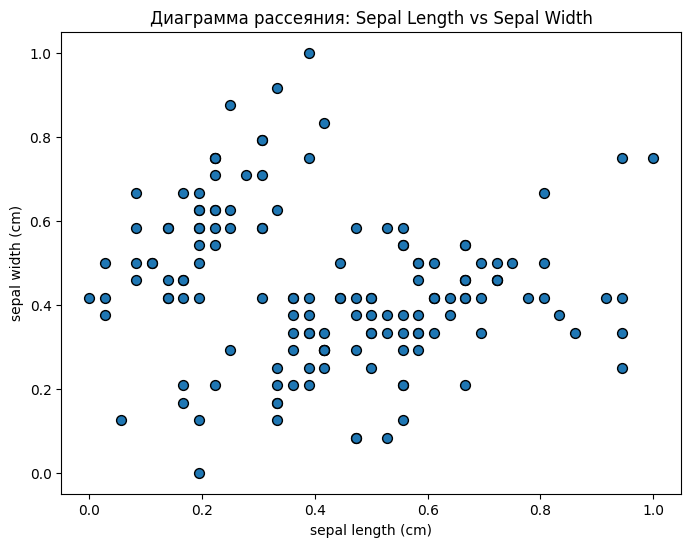

In [ ]:
# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(
    normalized_iris_df['sepal length (cm)'],
    normalized_iris_df['sepal width (cm)'],
    cmap='viridis',
    s=50,
    edgecolor='k'
)
plt.title("Диаграмма рассеяния: Sepal Length vs Sepal Width")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

